## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
data = pd.read_csv('~/Desktop/datacamp/merged_inputed_data.csv')

## Observe Features that are colinear and drop them

In [2]:
to_drop = ['responder','total_visits','CNT']

data.drop(to_drop, axis=1, inplace=True)

In [3]:
from tabulate import tabulate

summary = data.describe().transpose().round(2)
summary = summary.drop(['count'], axis=1)

# create markdown table
markdown_table = tabulate(summary, tablefmt="pipe", headers="keys")

print(markdown_table)


|                           |   mean |    std |   min |   25% |   50% |   75% |   max |
|:--------------------------|-------:|-------:|------:|------:|------:|------:|------:|
| meds_methadone_0          |  28.36 |  63.47 |     0 |     0 |     0 |    30 |   500 |
| meds_buprenorphine_0      |  12.15 |  24.61 |     0 |     0 |     8 |    12 |   216 |
| meds_methadone_1          | 126.5  | 184.81 |     0 |     0 |     0 |   260 |   960 |
| meds_buprenorphine_1      |  57.28 |  73.4  |     0 |     0 |    12 |   112 |   448 |
| meds_methadone_2          | 158.69 | 235.77 |     0 |     0 |     0 |   340 |  1460 |
| meds_buprenorphine_2      |  58.6  |  79.67 |     0 |     0 |     0 |   112 |   408 |
| meds_methadone_3          | 159.18 | 240.03 |     0 |     0 |     0 |   337 |  1120 |
| meds_buprenorphine_3      |  52.6  |  74.72 |     0 |     0 |     0 |   104 |   336 |
| meds_methadone_4          | 179.86 | 283.06 |     0 |     0 |     0 |   360 |  1840 |
| meds_buprenorphine_4      |  5

## Split the data

In [4]:
from sklearn.model_selection import train_test_split

X, y = data.drop(['TNT'], axis=1), data['TNT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Fit the model

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R-squared: {:.2f}'.format(r2_score(y_test, y_pred)))
print('\n')
print('Mean Absolute Error: {:.2f}'.format(mae))
print('\n')
print('Mean Squared Error: {:.2f}'.format(mse))


R-squared: 0.77


Mean Absolute Error: 2.57


Mean Squared Error: 18.62


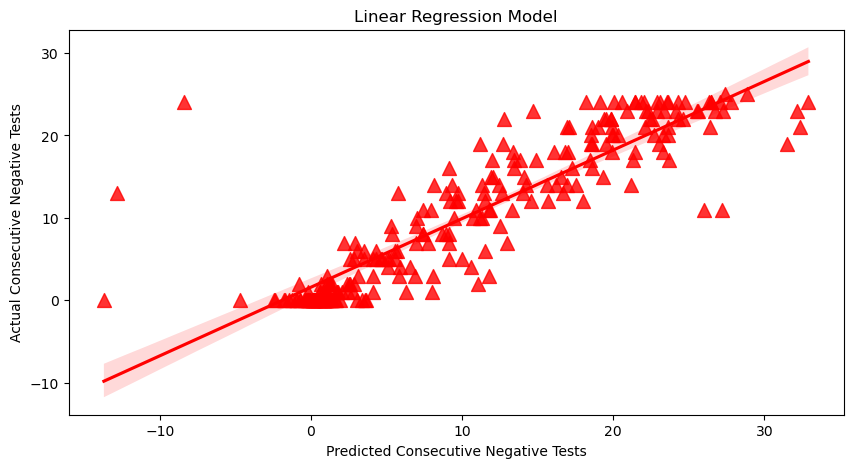

In [6]:

fig = sns.regplot(x=y_pred, y=y_test, color='red', marker="^", scatter_kws={"s": 100})
fig.set(title="Linear Regression Model", xlabel="Predicted Consecutive Negative Tests", ylabel="Actual Consecutive Negative Tests")
fig.figure.set_size_inches(10, 5)
plt.show(fig)

## Interpret Coefficients

In [7]:
coefs = pd.DataFrame({'feature': X_train.columns.values, 'coefficient':np.round(model.coef_, 3)})

print(coefs.to_markdown(index=False))

| feature                   |   coefficient |
|:--------------------------|--------------:|
| meds_methadone_0          |         0     |
| meds_buprenorphine_0      |         0.007 |
| meds_methadone_1          |         0.002 |
| meds_buprenorphine_1      |        -0.003 |
| meds_methadone_2          |         0.001 |
| meds_buprenorphine_2      |         0.004 |
| meds_methadone_3          |        -0.001 |
| meds_buprenorphine_3      |         0.002 |
| meds_methadone_4          |        -0.001 |
| meds_buprenorphine_4      |         0.002 |
| meds_methadone_5          |        -0.001 |
| meds_buprenorphine_5      |         0.002 |
| meds_methadone_6          |        -0     |
| meds_buprenorphine_6      |         0     |
| meds_methadone_7          |         0.001 |
| meds_buprenorphine_7      |         0.001 |
| meds_methadone_8          |         0.001 |
| meds_buprenorphine_8      |         0.001 |
| meds_methadone_9          |        -0     |
| meds_buprenorphine_9      |     

## Computing SHAP values

In [8]:
import shap
explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Interpreting SHAP values

Data index chosen: 226


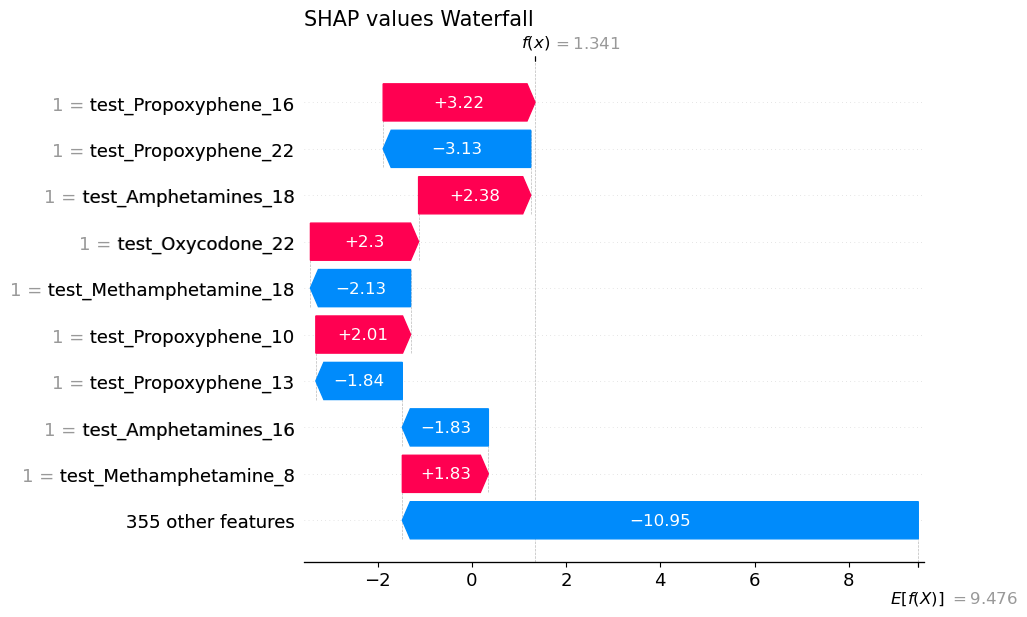

In [9]:
# choose random number from 1st dimension of shap_values shape
data_index = np.random.choice(shap_values.values.shape[0], 1, replace=False)[0]

print(f'Data index chosen: {data_index}')

plt.title('SHAP values Waterfall', fontsize=15, loc='left')

shap.plots.waterfall(shap_values[data_index], max_display=10)


## The Waterfall Plot
- Positive SHAP values point to the right
- The y-axis exhibits the individual featurs, along with the values for the selected data instance
- The feature values are ordered by their magnitudes fof their SHAP values
- The X-axis is on the scale of the SHAP values
- The X-axis also shows the estimated expected prediction 𝔼(𝑓 (𝑋)) and the actual is 𝑓 (𝑥(𝑖))
- The bars start at the bottom from the expected prediction and add up to the actual prediction

In [10]:
shap_values.shape

(261, 364)

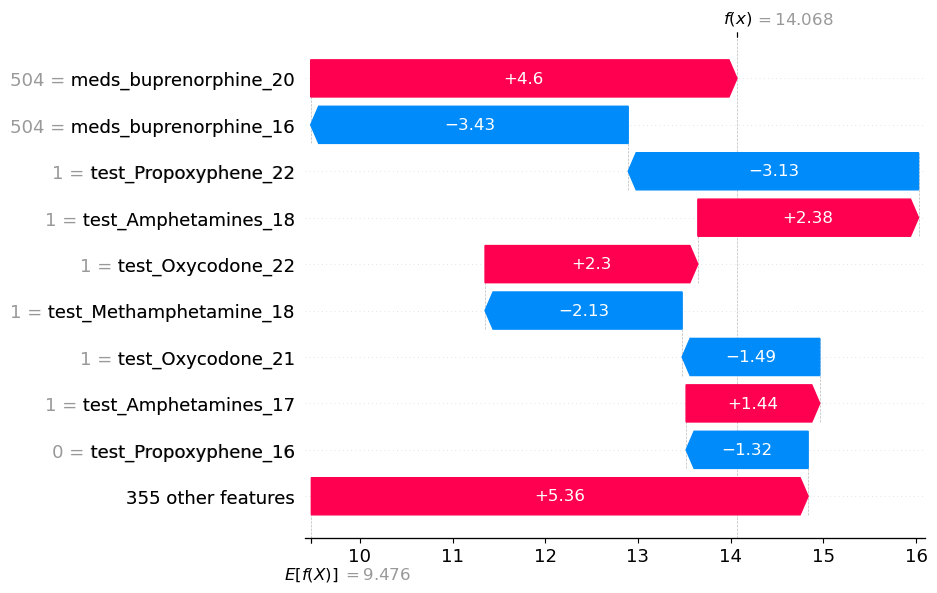

In [11]:
shap.waterfall_plot(shap_values[np.random.choice(shap_values.shape[0], 1, replace=False)[0]], max_display=10)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


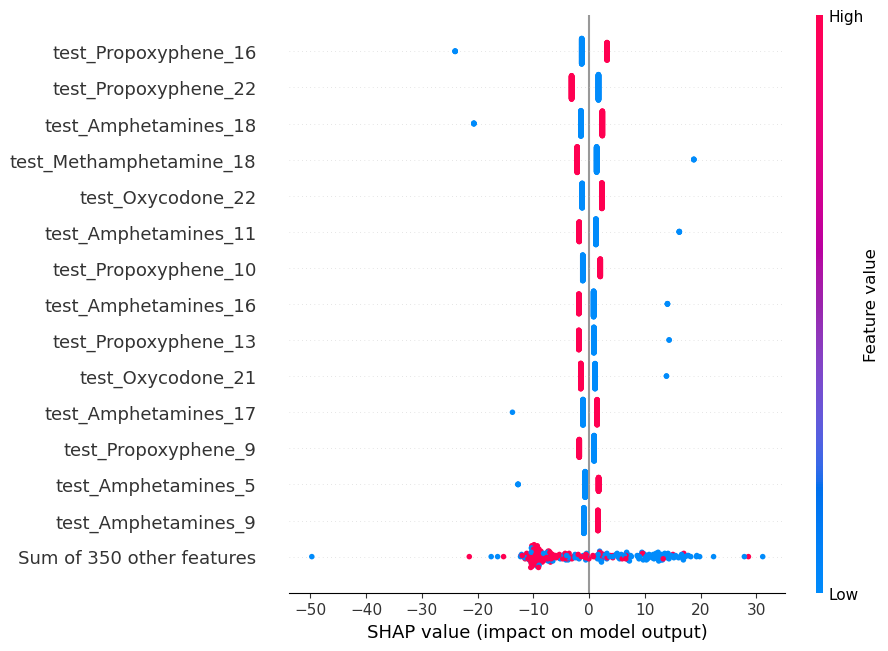

In [12]:
shap.plots.beeswarm(shap_values, max_display=15)

## Summary plot
- Also known as beeswarm plot.
- The x-axis represents the SHAP values, while the y-axis shows the
features, and the color indicates the feature’s value.
- Each row corresponds to a feature.
- The feature order is determined by importance, defined as the average of absolute SHAP values: 𝐼𝑗 = 1𝑛 ∑𝑛 𝑖=1 𝜙(𝑖)𝑗
• Each dot represents the SHAP value of a feature for a data point, resulting in a total of 𝑝 ⋅ 𝑛 dots.


## How to interpret the summary plot
- Observe the ranking of the features. The higher the feature, the greater its SHAP importance.
- For each feature of interest:
- Examine the distribution of the SHAP values. This provides insight into the various ways the feature values can influence the prediction. For instance, a wide spread indicates a broad rangeof influence.
- Understand the color trend for a feature: This offers an initial
insight into the direction of a feature effect and whether the relationship is monotonic or exhibits a more complex pattern.
- Look for color clusters that may indicate interesting data clusters.
Not relevant for linear models, but for non-linear ones.


## Comparison between coefficients and SHAP values

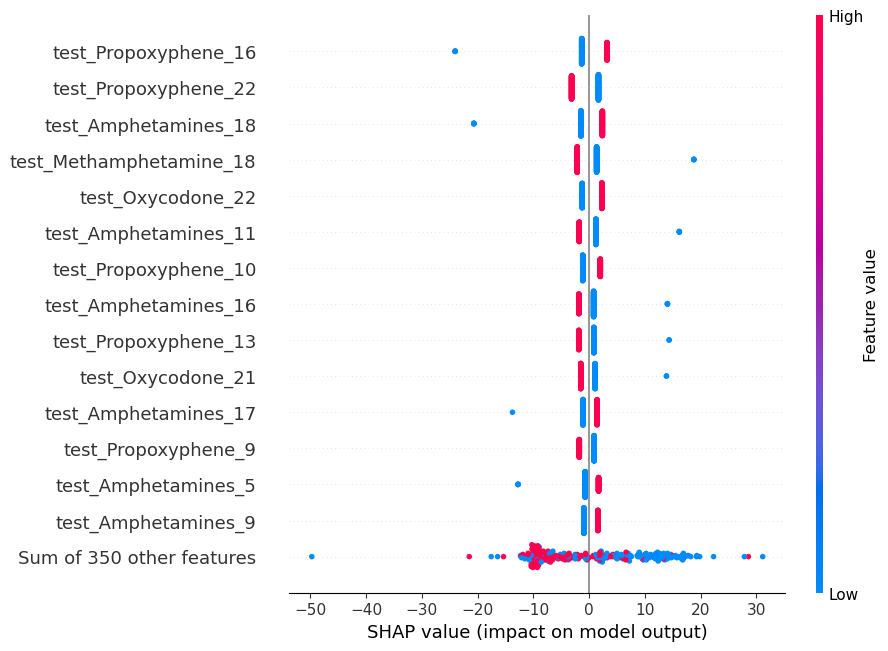

In [13]:
# run shap beeswarm plot
# run shap beeswarm plot

shap.plots.beeswarm(shap_values, max_display=15)


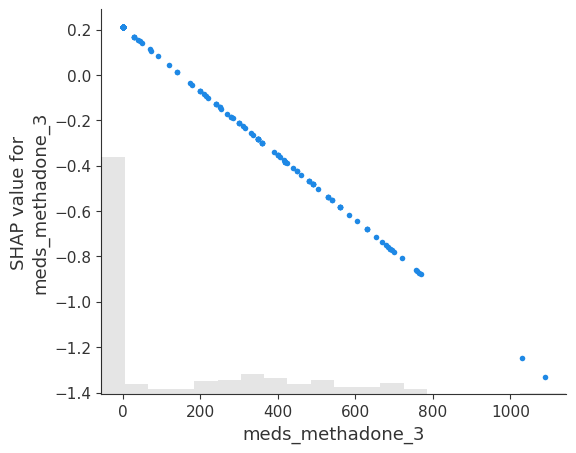

In [14]:
shap.plots.scatter(shap_values[:,'meds_methadone_3'])

## The dependence plot
- Also referred to as scatter plot.
- Mathematically, the plot contains these points: {(𝑥(𝑖)𝑗 , 𝜙(𝑖)𝑗 )}𝑛𝑖=1.
- The x-axis represents the feature value, and the y-axis represents the SHAP value.
- Highlighting feature interactions on the dependence plot can enhance its effectiveness.
- The dependence plot is similar to the summary plot for a single feature, but instead of using color to represent the feature value, these values are distributed across the x-axis.
- The grey histogram indicates the distribution of the feature values. Ranges with little data should be interpreted more cautiously.



In [15]:
feature = 'meds_methadone_3'
ind = X_train.columns.get_loc(feature)
coefs.coefficient[ind]

-0.001